In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# reading and displaying images
# cv2.imread(path, flag)
img_path = "data/02_img.png"
img = cv2.imread(img_path)
img

array([[[164, 134, 123],
        [178, 129, 120],
        [187, 121, 117],
        ...,
        [ 99, 126, 141],
        [113, 124, 140],
        [130, 126, 140]],

       [[ 89,   7,   1],
        [137,  22,  17],
        [154,  14,  11],
        ...,
        [ 56, 164, 173],
        [ 91, 163, 173],
        [137, 166, 177]],

       [[140,  19,  14],
        [199,  44,  36],
        [212,  38,  24],
        ...,
        [ 46, 245, 246],
        [ 95, 240, 244],
        [165, 244, 250]],

       ...,

       [[  0,  79,   0],
        [ 32, 163,  28],
        [  8, 171,   0],
        ...,
        [ 15,  28, 254],
        [ 24,  37, 246],
        [ 36,  47, 196]],

       [[  0,  78,   0],
        [ 34, 163,  27],
        [  6, 172,   0],
        ...,
        [  8,  26, 254],
        [ 20,  37, 246],
        [ 36,  49, 189]],

       [[ 26,  89,  17],
        [ 46, 163,  36],
        [ 10, 171,   0],
        ...,
        [  5,  29, 253],
        [ 23,  43, 227],
        [ 44,  58, 166]]

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(437, 311, 3)

In [6]:
img.size

407721

In [7]:
cv2.imshow("Image Display",img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

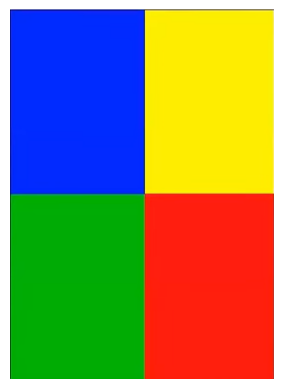

In [8]:
# displaying image using matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

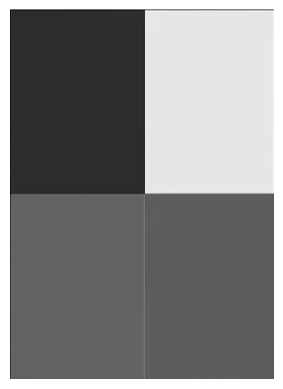

In [9]:
# Changing color space

gray_img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

In [10]:
## Splitting and merging of channels 
print(img.shape)

(437, 311, 3)


In [11]:
print('Top Left: ' , rgb_img[5,5])
print('Top Right: ' , rgb_img[5,310])
print('Bottom Right: ' , rgb_img[425,305])
print('Bottom Left: ' , rgb_img[425,5])

Top Left:  [  1  42 244]
Top Right:  [244 235 127]
Bottom Right:  [255  30   9]
Bottom Left:  [  0 170   3]


In [12]:
blue = rgb_img[:, :, 0]
green = rgb_img[:, :, 1]
red = rgb_img[:, :, 2]

In [13]:
cv2.imshow("blue pic : ", blue )
cv2.imshow("green pic : ", green )
cv2.imshow("red pic : ", red )
cv2.imshow("original pic : ", rgb_img )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
b, g, r = cv2.split(rgb_img)
img_merge = cv2.merge((b, g, r))

cv2.imshow("Merged pic : ", img_merge )
cv2.waitKey(0)
cv2.destroyAllWindows()

## Blurring 
- Mean Blur
- Median Blur
- Gaussian Blur
- Bilateral Filter

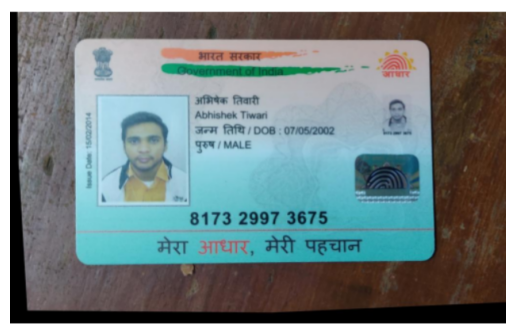

In [15]:
img = cv2.imread("data\sampleimg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

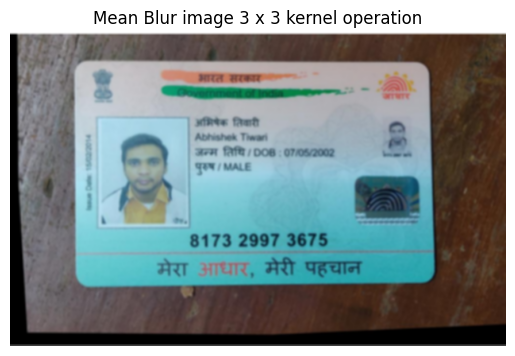

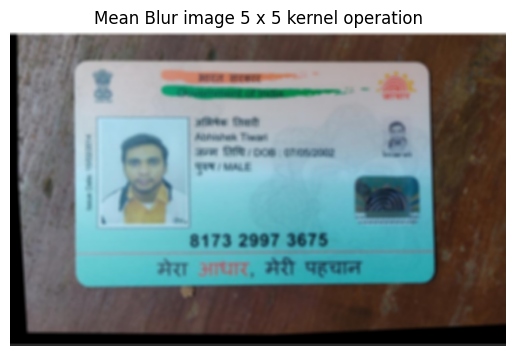

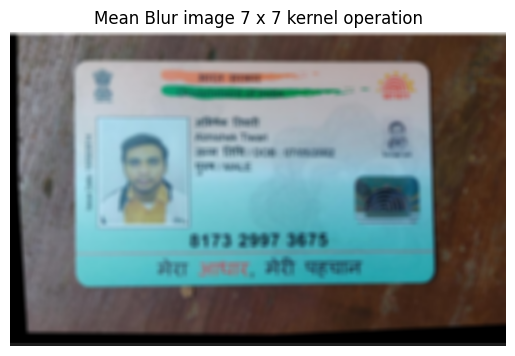

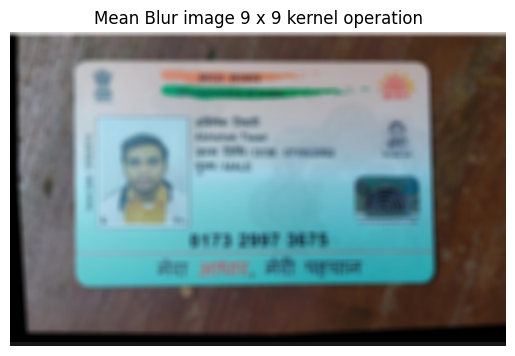

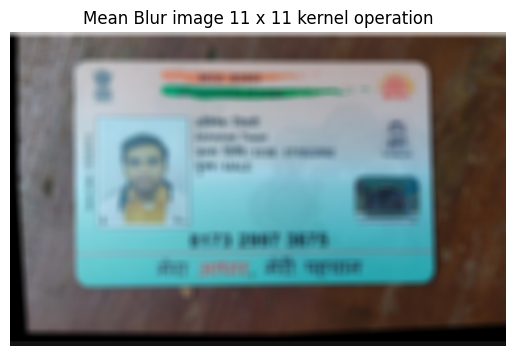

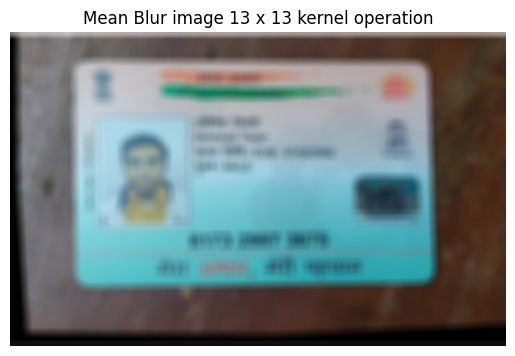

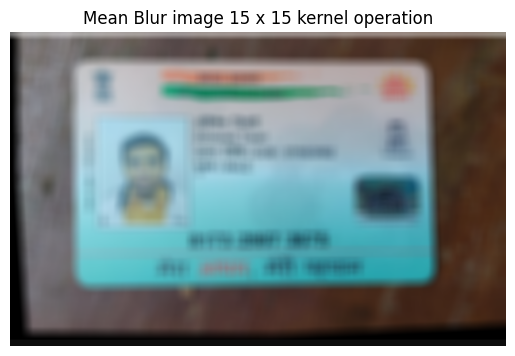

In [17]:
def makekernel(size):
    mk = np.ones((size, size) , dtype=np.float32) / (size**2)
    return mk

for size in range (3, 16, 2):
    blur_img = cv2.filter2D(img, -1, makekernel(size))
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Mean Blur image {size} x {size} kernel operation")
    plt.axis('off')
    plt.show()

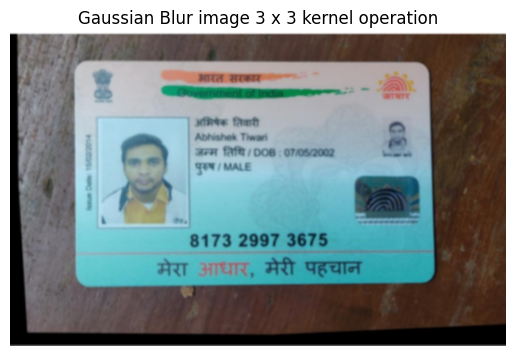

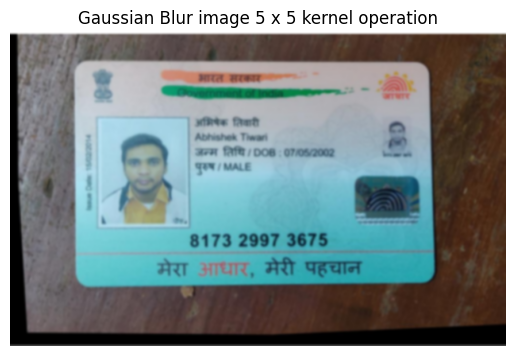

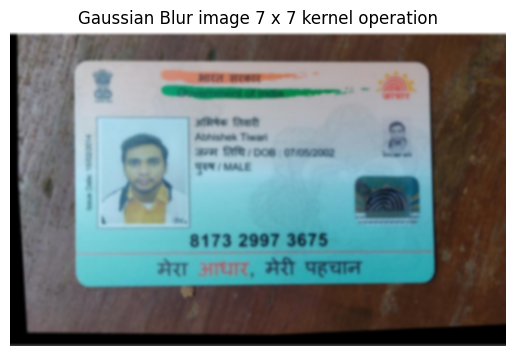

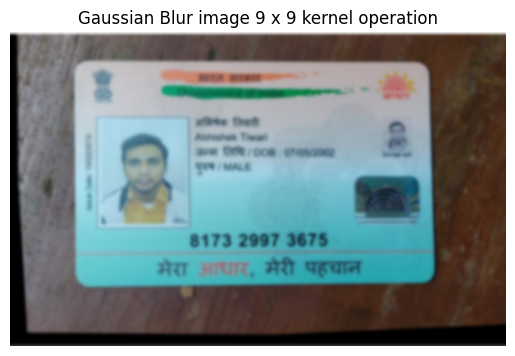

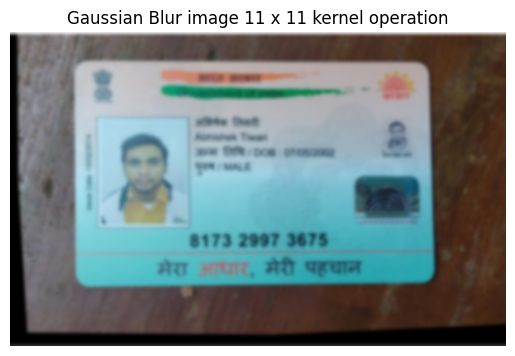

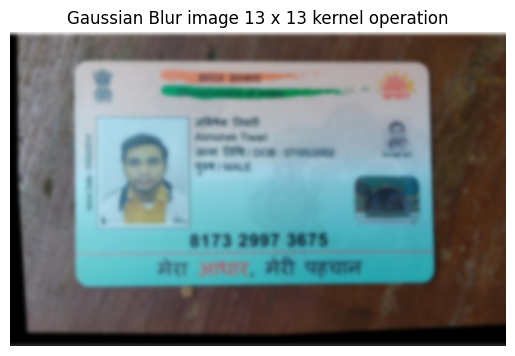

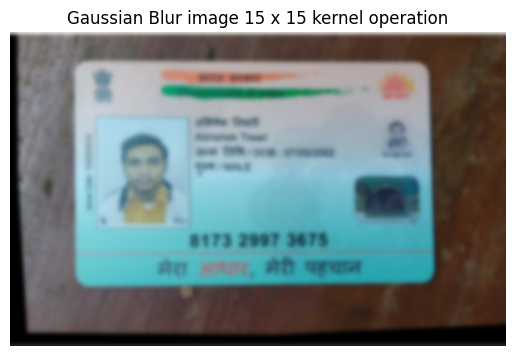

In [18]:

for size in range (3, 16, 2):
    blur_img = cv2.GaussianBlur(img, (size,size) , 0)
    plt.figure()
    plt.imshow(blur_img)
    plt.title(f"Gaussian Blur image {size} x {size} kernel operation")
    plt.axis('off')
    plt.show()

### Histogram

In [19]:
img.shape, img.size

((396, 625, 3), 742500)

In [20]:
img.ravel().shape

(742500,)

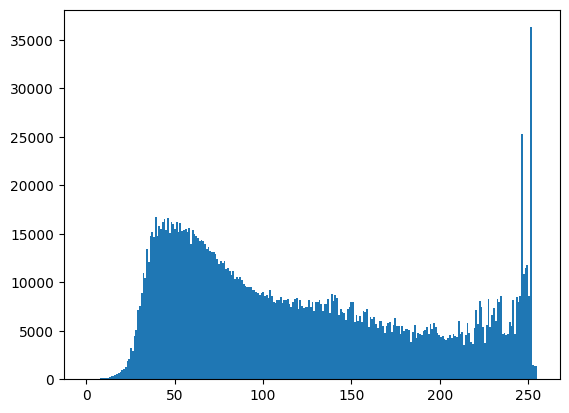

In [26]:
hist_img = cv2.imread('data\mountain.webp')
plt.hist(hist_img.ravel(), bins= 256, range=[0,255])
plt.show()

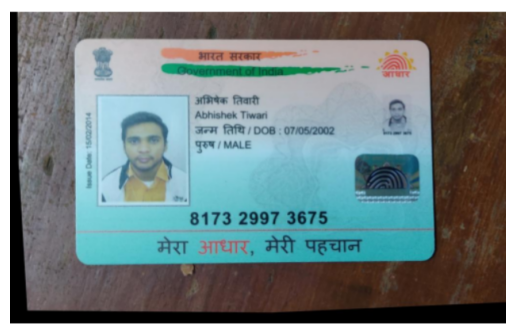

In [27]:
image = cv2.imread('data\sampleimg.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()

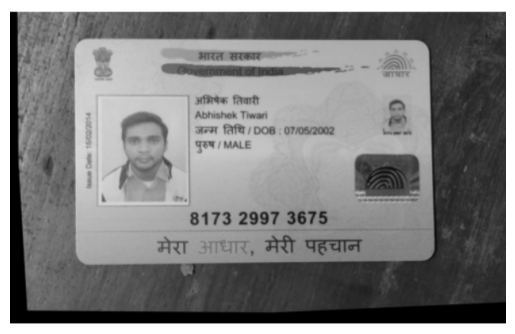

In [29]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show() 

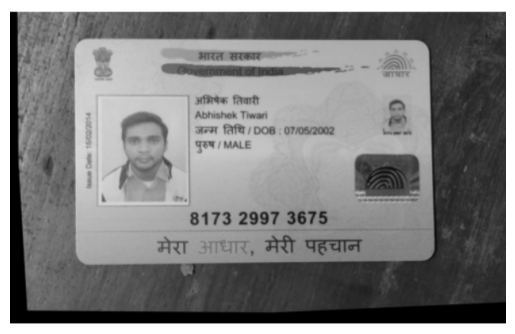

In [30]:
blurred_image = cv2.GaussianBlur(gray_image, (3,3), 0)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show() 

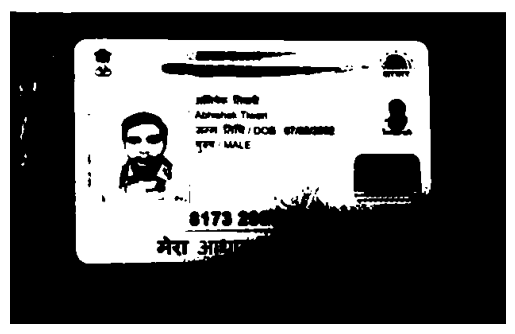

In [38]:
T, thresh = cv2.threshold(blurred_image, 150, 200,cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show() 

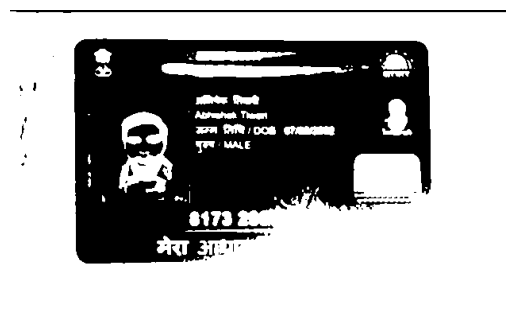

In [39]:
T, thresh = cv2.threshold(blurred_image, 150, 200,cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show() 

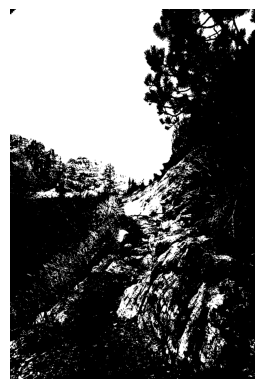

In [42]:
hist_img_gray = cv2.cvtColor(hist_img, cv2.COLOR_BGR2GRAY)
T, thresh = cv2.threshold(hist_img_gray, 150, 200,cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show() 

[INFO] otsu's thresholding value: 110.0


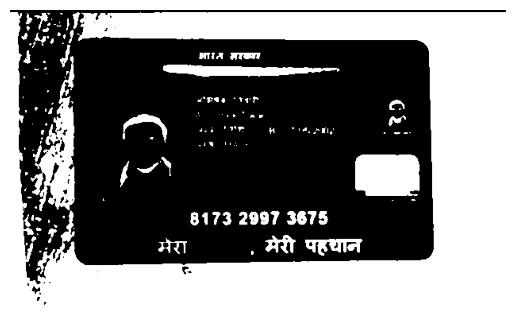

In [51]:
(T, otsu_threshInv) = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

print("[INFO] otsu's thresholding value: {}".format(T))
plt.imshow(otsu_threshInv, cmap='Greys_r')
plt.axis("off")
plt.show()